In [62]:
import pandas as pd
import json

In [63]:
range_list = list(range(5,21,5))
ind_list = ['rsi', 'adx', 'mfi', 'kama']

In [64]:
def plot_indicators(r_list: list, indicator: str, prompt_no: int):
    col_list = [f'{indicator}_{x}' for x in r_list]
    prompt_df = pd.read_csv(f'model_fine_tuned_data/prompt_{prompt_no}.csv', index_col=[0])
    prompt_df = prompt_df[['rsi_5', 'rsi_10', 'rsi_15','rsi_20', 'mfi_5', 'mfi_10', 'mfi_15', 'mfi_20', 'ema_5', 'ema_10', 'ema_15', 'ema_20']]
    prompt_df.plot(y=col_list, kind='line')
    return prompt_df


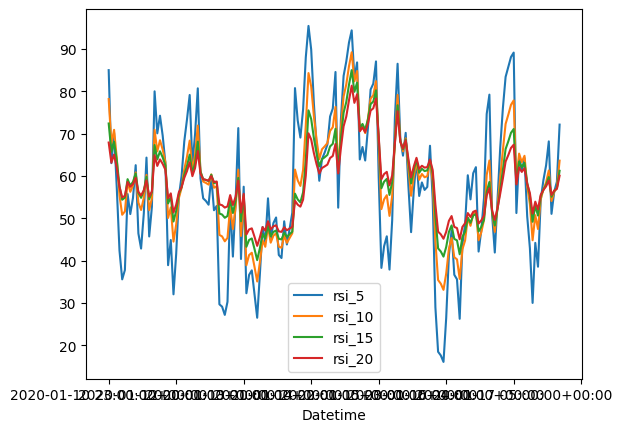

In [65]:
dt = plot_indicators(range_list, 'rsi', 5)

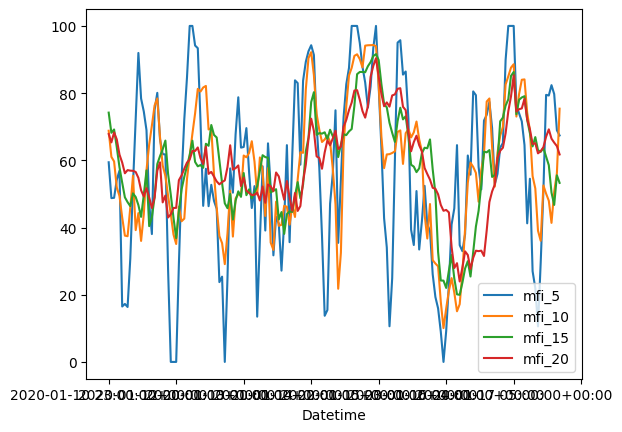

In [66]:
dt = plot_indicators(range_list, 'mfi', 5)

In [79]:
# datatset.json file for each line of prompt format
line_dataset = {"prompt":f"{dt.to_json()}:", "completion": " RSI_5 indikatoru ani bir ivme ile 80 seviyesi cibvarlarina yukselmistir. bu ani hareketler onem arz etmektedir. MFI_5 indikatoru 60 seviyelerine duserken MFI_10 indikatoru 70 seviyelerine yaklasmkatadir. Bu da orta vadede iyi bir yukselis gelebilecegi anlamina gelmektedir. EMA_5 indikatoru de tekrar yukselisine devam etmektedir."}

with open('datatset.json', 'a+') as j:
    j.write('\n')
    j.write(json.dumps(line_dataset))


In [84]:
#openai initiliazer
import openai
from dotenv import load_dotenv
import os

load_dotenv()

openai_api_key = os.getenv('OPENAI_API_KEY')

In [85]:
# jsonl file sended to openi for Fine-Tuned purposes
openai.api_key = openai_api_key
response_file_post = openai.File.create(
  file=open("datatset_prepared.jsonl", "rb"),
  purpose='fine-tune'
)
response_file_post

<File file id=file-rNx4Zl0bNp1c6Na0ALCzoVH2 at 0x23c763ce5e0> JSON: {
  "bytes": 533291,
  "created_at": 1683834624,
  "filename": "file",
  "id": "file-rNx4Zl0bNp1c6Na0ALCzoVH2",
  "object": "file",
  "purpose": "fine-tune",
  "status": "uploaded",
  "status_details": null
}

In [92]:
# Fine tuned and created model from file id
openai.FineTune.create(training_file="file-rNx4Zl0bNp1c6Na0ALCzoVH2")

<FineTune fine-tune id=ft-mhzCaPZwpXrfH3x1GRxzucB4 at 0x23c748b7cc0> JSON: {
  "created_at": 1683836638,
  "events": [
    {
      "created_at": 1683836638,
      "level": "info",
      "message": "Created fine-tune: ft-mhzCaPZwpXrfH3x1GRxzucB4",
      "object": "fine-tune-event"
    }
  ],
  "fine_tuned_model": null,
  "hyperparams": {
    "batch_size": null,
    "learning_rate_multiplier": null,
    "n_epochs": 4,
    "prompt_loss_weight": 0.01
  },
  "id": "ft-mhzCaPZwpXrfH3x1GRxzucB4",
  "model": "curie",
  "object": "fine-tune",
  "organization_id": "org-7rusTCuSSteRSnZzNwwIrZ5V",
  "result_files": [],
  "status": "pending",
  "training_files": [
    {
      "bytes": 533291,
      "created_at": 1683834624,
      "filename": "file",
      "id": "file-rNx4Zl0bNp1c6Na0ALCzoVH2",
      "object": "file",
      "purpose": "fine-tune",
      "status": "processed",
      "status_details": null
    }
  ],
  "updated_at": 1683836638,
  "validation_files": []
}

In [93]:
# See all fine-tuned model list and status
openai.FineTune.list()

<OpenAIObject list at 0x23c728464a0> JSON: {
  "data": [
    {
      "created_at": 1683835969,
      "fine_tuned_model": null,
      "hyperparams": {
        "batch_size": null,
        "learning_rate_multiplier": null,
        "n_epochs": 4,
        "prompt_loss_weight": 0.01
      },
      "id": "ft-kAhHsmceYiFD3CKTBJZgVMyi",
      "model": "curie",
      "object": "fine-tune",
      "organization_id": "org-7rusTCuSSteRSnZzNwwIrZ5V",
      "result_files": [],
      "status": "failed",
      "training_files": [
        {
          "bytes": 533291,
          "created_at": 1683834624,
          "filename": "file",
          "id": "file-rNx4Zl0bNp1c6Na0ALCzoVH2",
          "object": "file",
          "purpose": "fine-tune",
          "status": "processed",
          "status_details": null
        }
      ],
      "updated_at": 1683836003,
      "validation_files": []
    },
    {
      "created_at": 1683836638,
      "fine_tuned_model": null,
      "hyperparams": {
        "batch_size": 

In [89]:
# get response from new prompt
fine_tuned_model_id = "ft-kAhHsmceYiFD3CKTBJZgVMyi"
prompt = json.dumps(dt.to_json())

response = openai.Completion.create(
    model=fine_tuned_model_id,
    prompt=prompt,
    max_tokens=300
)

output_text = response.choices[0].text
print(output_text)

InvalidRequestError: The model `ft-kAhHsmceYiFD3CKTBJZgVMyi` does not exist

In [94]:
# get fine-tune id information
fine_tune_id = "ft-mhzCaPZwpXrfH3x1GRxzucB4"

# Use the OpenAI API to retrieve information about the fine-tuning task
response = openai.FineTune.retrieve(fine_tune_id)

# Print the JSON response
print(json.dumps(response, indent=2))

{
  "object": "fine-tune",
  "id": "ft-mhzCaPZwpXrfH3x1GRxzucB4",
  "hyperparams": {
    "n_epochs": 4,
    "batch_size": null,
    "prompt_loss_weight": 0.01,
    "learning_rate_multiplier": null
  },
  "organization_id": "org-7rusTCuSSteRSnZzNwwIrZ5V",
  "model": "curie",
  "training_files": [
    {
      "object": "file",
      "id": "file-rNx4Zl0bNp1c6Na0ALCzoVH2",
      "purpose": "fine-tune",
      "filename": "file",
      "bytes": 533291,
      "created_at": 1683834624,
      "status": "processed",
      "status_details": null
    }
  ],
  "validation_files": [],
  "result_files": [],
  "created_at": 1683836638,
  "updated_at": 1683836663,
  "status": "failed",
  "fine_tuned_model": null,
  "events": [
    {
      "object": "fine-tune-event",
      "level": "info",
      "message": "Created fine-tune: ft-mhzCaPZwpXrfH3x1GRxzucB4",
      "created_at": 1683836638
    },
    {
      "object": "fine-tune-event",
      "level": "info",
      "message": "Error: The training file does

In [95]:
# delete fine-tuned models
openai.Model.delete("ft-kAhHsmceYiFD3CKTBJZgVMyi")

InvalidRequestError: The model 'ft-kAhHsmceYiFD3CKTBJZgVMyi' does not exist